<a href="https://colab.research.google.com/github/lorenzopaolucci/Cygno_Lab_II/blob/Teresa/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib import cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from scipy.stats import norm
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit

L = 50                            # Dimensione griglia
centers = [[(L-1)*0.5,(L-1)*0.5]] # Centro del blob
sigma_noise = 2                   # Sigma del rumore
sigma_spatial = 4                 # Sigma della distribuzione spaziale del blob (in pixel)
n_samples =3000                   # Numero di segnali generati
th = 1.5*sigma_noise

**GENERAZIONE GRIGLIA PER 100 EVENTI**

In [0]:
# Eseguire solo una volta, per generare le run

os.system('mkdir -p runs')
os.chdir('runs') 

for run in np.arange(0,500,1):

    # Genero le griglie

    grid = np.zeros((L,L))        # Contiene le "coordinate" di ogni pixel, e il valore del segnale
    background = np.zeros((L,L))  # Griglia background
    signal = np.zeros((L,L))      # Griglia segnale

    # Genero il fondo

    for i in np.arange(0,L,1):

      for j in np.arange(0,L,1):

        r = np.random.normal(0,2)
        background[i][j] = r

    # Genero il blob

    X, blob_labels = make_blobs(n_samples=n_samples, centers=centers, cluster_std=sigma_spatial, random_state=run)

    # Discretizzazione del blob

    for j in np.arange(0,len(X),1):

      x = int(np.round(X[j][0]))
      y = int(np.round(X[j][1]))

      signal[x][y] += 1

    # Somma background+segnale

    for j in np.arange(0,L,1):

      for i in np.arange(0,L,1):

        s = signal[i][j] + background[i][j]

        if s >= th:

          grid[i][j] = np.round(s)

        if signal[i][j] == 0 and background[i][j] >= th: # Contiene solo il rumore "puro", cioè quello che non si somma al segnale

          background[i][j] = np.round(background[i][j])

        else:

          background[i][j] = 0

        if s >= th and signal[i][j] != 0:                # Contiene solo il segnale (a cui ora si è aggiunto il rumore)

          signal[i][j] = np.round(s)

        else:

          signal[i][j] = 0

    # Creazione array coordinate per DBSCAN

    points_list = []
    signal_list = []
    background_list= []
    phot = 0
     
    for i in np.arange(0,L,1):

      for j in np.arange(0,L,1):

        if grid[i][j] != 0:

          points_list.append([j,i,grid[i][j]])

        if signal[i][j] != 0:
          signal_list.append([j,i,signal[i][j]])
          phot += signal[i][j]
     
        if background[i][j] != 0:
          background_list.append([j,i,background[i][j]])

    points = np.array(points_list)
    signal_plot = np.array(signal_list)
    background_plot = np.array(background_list)

    # Esportazione dataframe

    df1 = pd.DataFrame(points, index=None)
    df2 = pd.DataFrame(signal_plot, index=None)

    df1.to_csv('grid_%d.csv' %run,index_label=False)
    df2.to_csv('signal_%d.csv' %run,index_label=False)

    #print('%d Background pixels generated over threshold, %d Signal photons (summed with background) over threshold in %d pixels' %(len(background_plot),phot,len(signal_plot)))

In [0]:
# Eseguire se in runtime locale si ha un set di dati dentro la cartella runs
os.chdir('runs')

**DBSCAN**

Run 0


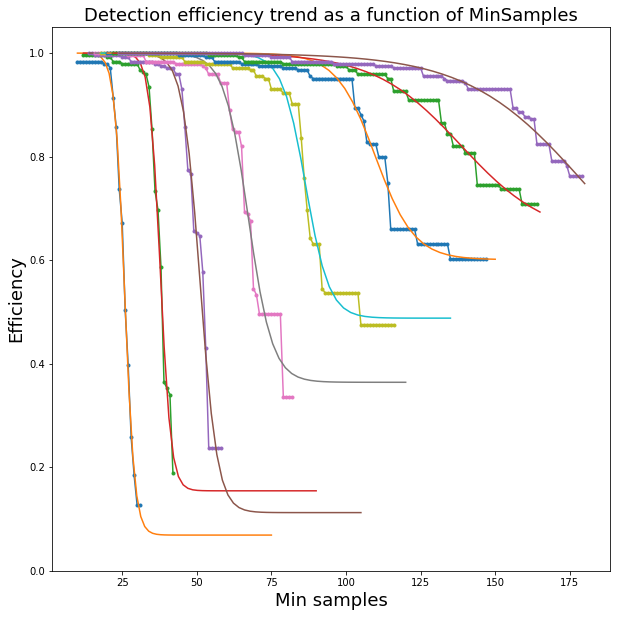

Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
Run 20
Run 21
Run 22
Run 23
Run 24
Run 25
Run 26
Run 27
Run 28
Run 29
Run 30
Run 31
Run 32
Run 33
Run 34
Run 35
Run 36
Run 37
Run 38
Run 39
Run 40
Run 41
Run 42
Run 43
Run 44
Run 45
Run 46
Run 47
Run 48
Run 49
Run 50
Run 51
Run 52
Run 53
Run 54
Run 55
Run 56
Run 57
Run 58
Run 59
Run 60
Run 61
Run 62
Run 63
Run 64
Run 65
Run 66
Run 67
Run 68
Run 69
Run 70
Run 71
Run 72
Run 73
Run 74
Run 75
Run 76
Run 77
Run 78
Run 79
Run 80
Run 81
Run 82
Run 83
Run 84
Run 85
Run 86
Run 87
Run 88
Run 89
Run 90
Run 91
Run 92
Run 93
Run 94
Run 95
Run 96
Run 97
Run 98
Run 99
Run 100


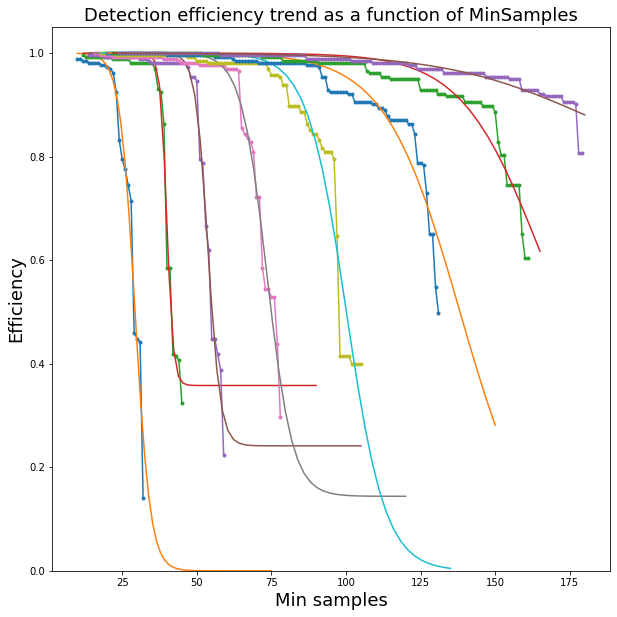

Run 101
Run 102
Run 103
Run 104
Run 105
Run 106
Run 107
Run 108
Run 109
Run 110
Run 111
Run 112
Run 113
Run 114
Run 115
Run 116
Run 117
Run 118
Run 119
Run 120
Run 121
Run 122
Run 123
Run 124
Run 125
Run 126
Run 127
Run 128
Run 129
Run 130
Run 131
Run 132
Run 133
Run 134
Run 135
Run 136
Run 137
Run 138
Run 139
Run 140
Run 141
Run 142
Run 143
Run 144
Run 145
Run 146
Run 147
Run 148
Run 149
Run 150
Run 151
Run 152
Run 153
Run 154
Run 155
Run 156
Run 157
Run 158
Run 159
Run 160
Run 161
Run 162
Run 163
Run 164
Run 165
Run 166
Run 167
Run 168
Run 169
Run 170
Run 171
Run 172
Run 173
Run 174
Run 175
Run 176
Run 177
Run 178
Run 179
Run 180
Run 181
Run 182
Run 183
Run 184
Run 185
Run 186
Run 187
Run 188
Run 189
Run 190
Run 191
Run 192
Run 193
Run 194
Run 195
Run 196
Run 197
Run 198
Run 199
Run 200


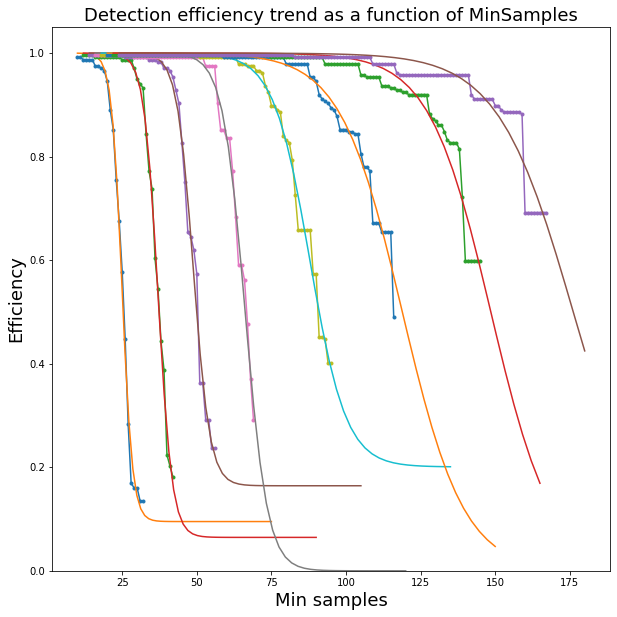

Run 201
Run 202
Run 203
Run 204
Run 205
Run 206
Run 207
Run 208
Run 209
Run 210
Run 211
Run 212
Run 213
Run 214
Run 215
Run 216
Run 217
Run 218
Run 219
Run 220
Run 221
Run 222
Run 223
Run 224
Run 225
Run 226
Run 227
Run 228
Run 229
Run 230
Run 231
Run 232
Run 233
Run 234
Run 235
Run 236
Run 237
Run 238
Run 239
Run 240
Run 241
Run 242
Run 243
Run 244
Run 245
Run 246
Run 247
Run 248
Run 249
Run 250
Run 251
Run 252
Run 253
Run 254
Run 255
Run 256
Run 257
Run 258
Run 259
Run 260
Run 261
Run 262
Run 263
Run 264
Run 265
Run 266
Run 267
Run 268
Run 269
Run 270
Run 271
Run 272
Run 273
Run 274
Run 275
Run 276
Run 277
Run 278
Run 279
Run 280
Run 281
Run 282
Run 283
Run 284
Run 285
Run 286
Run 287
Run 288
Run 289
Run 290
Run 291
Run 292
Run 293
Run 294
Run 295
Run 296
Run 297
Run 298
Run 299
Run 300


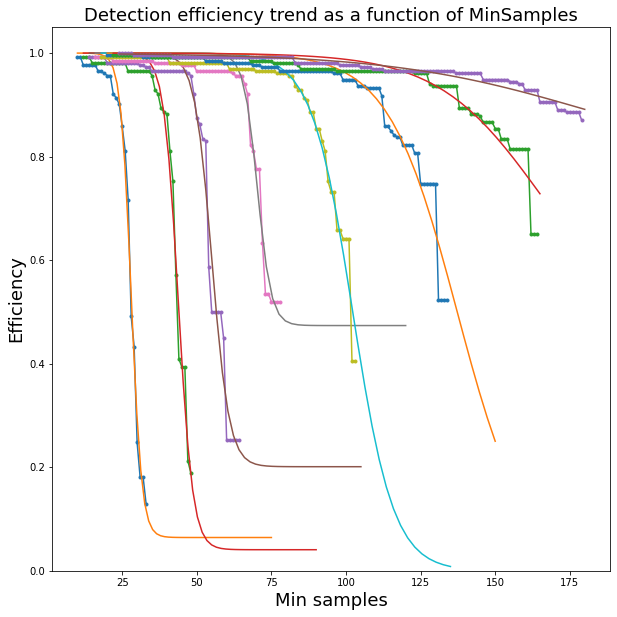

Run 301
Run 302
Run 303
Run 304
Run 305
Run 306
Run 307
Run 308
Run 309
Run 310
Run 311
Run 312
Run 313
Run 314
Run 315
Run 316
Run 317
Run 318
Run 319
Run 320
Run 321
Run 322
Run 323
Run 324
Run 325
Run 326
Run 327
Run 328
Run 329
Run 330
Run 331
Run 332
Run 333
Run 334
Run 335
Run 336
Run 337
Run 338
Run 339
Run 340
Run 341
Run 342
Run 343
Run 344
Run 345
Run 346
Run 347
Run 348
Run 349
Run 350
Run 351
Run 352
Run 353
Run 354
Run 355
Run 356
Run 357
Run 358
Run 359
Run 360
Run 361
Run 362
Run 363
Run 364
Run 365
Run 366
Run 367
Run 368
Run 369
Run 370
Run 371
Run 372
Run 373
Run 374
Run 375
Run 376
Run 377
Run 378
Run 379
Run 380
Run 381
Run 382
Run 383
Run 384
Run 385
Run 386
Run 387
Run 388
Run 389
Run 390
Run 391
Run 392
Run 393
Run 394
Run 395
Run 396
Run 397
Run 398
Run 399
Run 400


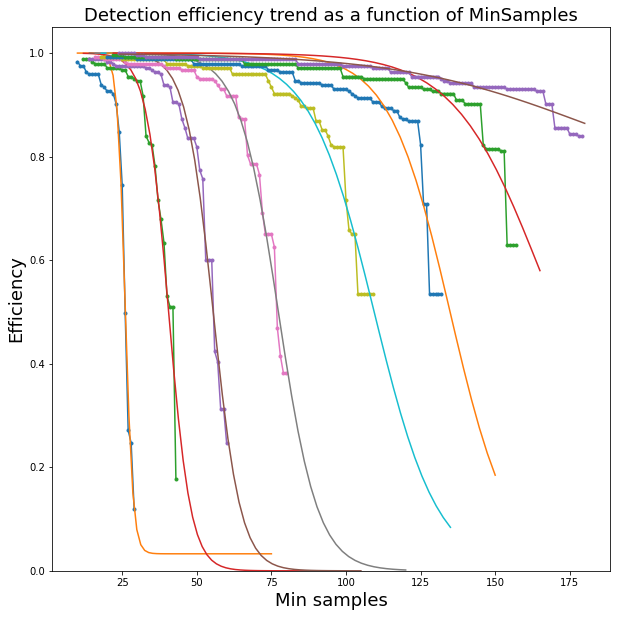

Run 401
Run 402
Run 403
Run 404
Run 405
Run 406
Run 407
Run 408
Run 409
Run 410
Run 411
Run 412
Run 413
Run 414
Run 415
Run 416
Run 417
Run 418
Run 419
Run 420
Run 421
Run 422
Run 423
Run 424
Run 425
Run 426
Run 427
Run 428
Run 429
Run 430
Run 431
Run 432
Run 433
Run 434
Run 435
Run 436
Run 437
Run 438
Run 439
Run 440
Run 441
Run 442
Run 443
Run 444
Run 445
Run 446
Run 447
Run 448
Run 449
Run 450
Run 451
Run 452
Run 453
Run 454
Run 455
Run 456
Run 457
Run 458
Run 459
Run 460
Run 461
Run 462
Run 463
Run 464
Run 465
Run 466
Run 467
Run 468
Run 469
Run 470
Run 471
Run 472
Run 473
Run 474
Run 475
Run 476
Run 477
Run 478
Run 479
Run 480
Run 481
Run 482
Run 483
Run 484
Run 485
Run 486
Run 487
Run 488
Run 489
Run 490
Run 491
Run 492
Run 493
Run 494
Run 495
Run 496
Run 497
Run 498
Run 499


In [0]:
from scipy.optimize import curve_fit
hist_purity = []
purity_highest = []

hist_efficiency = []
efficiency_highest =[]

hist_ginocchio = []

list_e = []
list_p = []
list_n = []

ao = 500

def dist1(x,a,b,c,d):
  return 1 - b/(1+np.exp(-c*(x-d))) 

for run in np.arange(0,ao,1):

    # Importazione dataframe

    print('Run %d' %run)

    df1 = pd.read_csv('grid_%d.csv' %run)
    df2 = pd.read_csv('signal_%d.csv' %run)

    points = pd.DataFrame.to_numpy(df1)
    signal_plot = pd.DataFrame.to_numpy(df2)

    min_eps = 5
    max_eps = 13
    step_eps = 1

    purity_highest_temp = []
    detection_efficiency_highest = []

    hist_temp_purity = []
    hist_temp_efficiency = []
    hist_temp_ginocchio = []

    list_temp_e = []
    list_temp_p = []
    list_temp_n = []

    for eps in np.arange(min_eps, max_eps, step_eps):

        min_min_samples = 2*eps
        max_min_samples = 15*eps
        step_min_samples = 1

        purity_max = 0
        detection_efficiency_max = 0
        detection_efficiency_plot = []
        min_samples_range=[]

        for min_samples in np.arange(min_min_samples, max_min_samples, step_min_samples):


            # CLUSTERING

            db = DBSCAN(eps, min_samples).fit(points)
            core_samples_mask = np.zeros_like(db.labels_,dtype=bool)       # Inizializza un array booleano, della stessa forma di labels_
            core_samples_mask[db.core_sample_indices_] = True              # Considera tutti i core trovati da dbscan
            labels = db.labels_

            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)    # Conta i cluster, togliendo il  rumore (k=-1)
            n_noise_ = list(labels).count(-1)                              # Numero di punti di rumore

            # Plot dei cluster individuati

            unique_labels = set(labels)
            colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]             # Sceglie la palette di   colori senza il nero

            cluster_efficiency = 0
            weight_sum = 0

            clusters_points = (labels==-1)  # Seleziona tutti i punti clusterizzati tranne il rumore
            
            punti = points[~clusters_points]  # Punti clusterizzati da dbscan come segnale
           
            for k, col in zip(unique_labels, colors):                      # Per ogni cluster, associo un colore
            
                class_member_mask = (labels == k)                          # Seleziona tutti i punti del cluster k

                xy_core = points[class_member_mask & core_samples_mask]    # Solo se è nel cluster E è un core point
                xy_border = points[class_member_mask & ~core_samples_mask] # Solo se è nel cluster E non è core  ==  è un edge point del cluster
                
                # Efficienza della clusterizzazione

                phot = 0                                      # Contatore di fotoni
                x = 0
                y = 0

                if k == -1:

                  col = [0, 0, 0, 1]                          # Nero per il rumore

                else:

                  for i in np.arange(0,len(xy_core),1):       # Somme sui pixel contenuti nel cluster k, pesate con il numero di fotoni
                    
                    x += xy_core[i][0] * xy_core[i][2]
                    y += xy_core[i][1] * xy_core[i][2]
                    phot += xy_core[i][2]

                  for i in np.arange(0,len(xy_border),1):
                    
                    x += xy_border[i][0] * xy_border[i][2]
                    y += xy_border[i][1] * xy_border[i][2]
                    phot += xy_border[i][2]

                  x /= phot
                  y /= phot

                  dist = np.sqrt((x-centers[0][0])**2+(y-centers[0][1])**2)
                  clust_eff_partial = ((len(signal_plot) - abs(len(signal_plot)-len(xy_core)-len(xy_border)) )/len(signal_plot))*1/dist

                  if clust_eff_partial < 0:
                    
                    cluster_efficiency += 0

                  else:

                    cluster_efficiency += clust_eff_partial
                  
                  weight_sum += 1/dist

            # Purezza

            if len(punti) > 0:                                # Considero solo le run che trovano segnale

              len_sig=len(signal_plot)
              len_punti=len(punti)

              count_p=0                                       # Conta i pixel trovati da dbscan correttamente
              for i in range (len_sig):
                for j in range (len_punti):
                  if punti[j,0]==signal_plot[i,0] and punti[j,1]==signal_plot[i,1] and punti[j,2]==signal_plot[i,2]:
                    count_p+=1
                
              purity=1-(len(punti)-count_p)/count_p
              detection_efficiency=count_p/len(signal_plot)
              detection_efficiency_plot.append(detection_efficiency)
              min_samples_range.append(min_samples)

              list_temp_e.append(detection_efficiency)
              list_temp_p.append(purity)
              list_temp_n.append(n_clusters_)

              if purity>purity_max:

                purity_max = purity
                purity_min_samples = min_samples

              if detection_efficiency >= detection_efficiency_max:
                
                detection_efficiency_max = detection_efficiency
                detection_efficiency_min_samples = min_samples

            else:
              
              list_temp_e.append(0)
              list_temp_p.append(0)
              list_temp_n.append(n_clusters_)

            # Efficienza di rivelazione 
             
            if n_clusters_ != 0:

              cluster_efficiency /= weight_sum

        hist_temp_purity.append(purity_min_samples)
        purity_highest_temp.append(purity_max)

        hist_temp_efficiency.append(detection_efficiency_min_samples)
        detection_efficiency_highest.append(detection_efficiency_max)

        #print('min samples', min_samples_range)
        #print('eff', detection_efficiency_plot)
        par_x, cov_x= curve_fit(dist1,min_samples_range,detection_efficiency_plot,maxfev=100000, p0=[1, 1, 0.5, 10], bounds=([0,0.2,0,0], [1,1,1,max_min_samples]) )
        hist_temp_ginocchio.append(par_x[3] + np.log((0.95-par_x[0])/(par_x[0]-par_x[1]-0.95))/par_x[2])
        #print('gin', hist_temp_ginocchio)

        if (run%100)==0:
          plt.title('Detection efficiency trend as a function of MinSamples',fontsize=18)
          plt.xlabel('Min samples',fontsize=18)
          plt.ylabel('Efficiency',fontsize=18)
          plt.plot(min_samples_range,detection_efficiency_plot,'.-',label='Eps = %.1lf' %eps)
          x = np.linspace(min_min_samples, max_min_samples)
          y_fit = dist1(x, par_x[0], par_x[1], par_x[2], par_x[3])
          plt.plot(x, y_fit, '-')
          fig = matplotlib.pyplot.gcf()
          fig.set_size_inches(10, 10)
          plt.ylim(0, 1.05)
    plt.show()

    list_e.append(list_temp_e)
    list_p.append(list_temp_p)
    list_n.append(list_temp_n)

    purity_highest.append(purity_highest_temp)
    hist_purity.append(hist_temp_purity)

    efficiency_highest.append(detection_efficiency_highest)
    hist_efficiency.append(hist_temp_efficiency)

    hist_ginocchio.append(hist_temp_ginocchio)

Run 100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:187: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:187: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:187: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versi

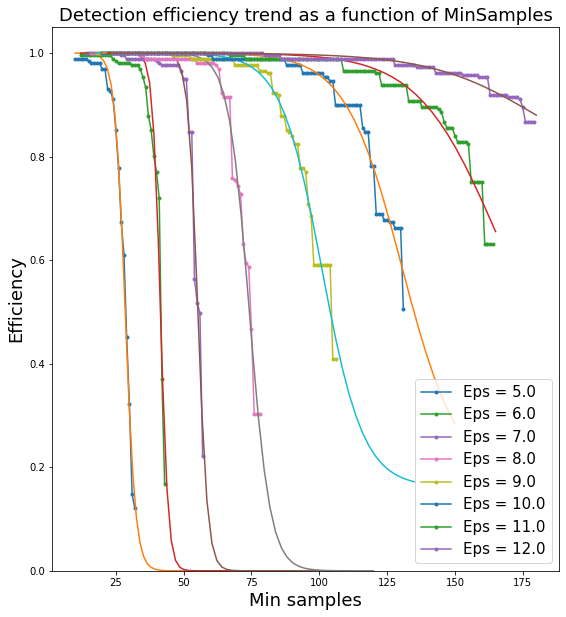

In [0]:
from scipy.optimize import curve_fit
hist_purity = []
purity_highest = []

hist_efficiency = []
efficiency_highest =[]

hist_ginocchio = []

list_e = []
list_p = []
list_n = []

ao1 = 100
ao2 = ao1 + 1

def dist1(x,a,b,c,d):
  return 1 - b/(1+np.exp(-c*(x-d))) 

for run in np.arange(ao1,ao2,1):

    # Importazione dataframe

    print('Run %d' %run)

    df1 = pd.read_csv('grid_%d.csv' %run)
    df2 = pd.read_csv('signal_%d.csv' %run)

    points = pd.DataFrame.to_numpy(df1)
    signal_plot = pd.DataFrame.to_numpy(df2)

    min_eps = 5
    max_eps = 13
    step_eps = 1

    purity_highest_temp = []
    detection_efficiency_highest = []

    hist_temp_purity = []
    hist_temp_efficiency = []
    hist_temp_ginocchio = []

    list_temp_e = []
    list_temp_p = []
    list_temp_n = []

    for eps in np.arange(min_eps, max_eps, step_eps):

        min_min_samples = 2*eps
        max_min_samples = 15*eps
        step_min_samples = 1

        purity_max = 0
        detection_efficiency_max = 0
        detection_efficiency_plot = []
        min_samples_range=[]

        for min_samples in np.arange(min_min_samples, max_min_samples, step_min_samples):


            # CLUSTERING

            db = DBSCAN(eps, min_samples).fit(points)
            core_samples_mask = np.zeros_like(db.labels_,dtype=bool)       # Inizializza un array booleano, della stessa forma di labels_
            core_samples_mask[db.core_sample_indices_] = True              # Considera tutti i core trovati da dbscan
            labels = db.labels_

            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)    # Conta i cluster, togliendo il  rumore (k=-1)
            n_noise_ = list(labels).count(-1)                              # Numero di punti di rumore

            # Plot dei cluster individuati

            unique_labels = set(labels)
            colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]             # Sceglie la palette di   colori senza il nero

            cluster_efficiency = 0
            weight_sum = 0

            clusters_points = (labels==-1)  # Seleziona tutti i punti clusterizzati tranne il rumore
            
            punti = points[~clusters_points]  # Punti clusterizzati da dbscan come segnale
           
            for k, col in zip(unique_labels, colors):                      # Per ogni cluster, associo un colore
            
                class_member_mask = (labels == k)                          # Seleziona tutti i punti del cluster k

                xy_core = points[class_member_mask & core_samples_mask]    # Solo se è nel cluster E è un core point
                xy_border = points[class_member_mask & ~core_samples_mask] # Solo se è nel cluster E non è core  ==  è un edge point del cluster
                
                # Efficienza della clusterizzazione

                phot = 0                                      # Contatore di fotoni
                x = 0
                y = 0

                if k == -1:

                  col = [0, 0, 0, 1]                          # Nero per il rumore

                else:

                  for i in np.arange(0,len(xy_core),1):       # Somme sui pixel contenuti nel cluster k, pesate con il numero di fotoni
                    
                    x += xy_core[i][0] * xy_core[i][2]
                    y += xy_core[i][1] * xy_core[i][2]
                    phot += xy_core[i][2]

                  for i in np.arange(0,len(xy_border),1):
                    
                    x += xy_border[i][0] * xy_border[i][2]
                    y += xy_border[i][1] * xy_border[i][2]
                    phot += xy_border[i][2]

                  x /= phot
                  y /= phot

                  dist = np.sqrt((x-centers[0][0])**2+(y-centers[0][1])**2)
                  clust_eff_partial = ((len(signal_plot) - abs(len(signal_plot)-len(xy_core)-len(xy_border)) )/len(signal_plot))*1/dist

                  if clust_eff_partial < 0:
                    
                    cluster_efficiency += 0

                  else:

                    cluster_efficiency += clust_eff_partial
                  
                  weight_sum += 1/dist

            # Purezza

            if len(punti) > 0:                                # Considero solo le run che trovano segnale

              len_sig=len(signal_plot)
              len_punti=len(punti)

              count_p=0                                       # Conta i pixel trovati da dbscan correttamente
              for i in range (len_sig):
                for j in range (len_punti):
                  if punti[j,0]==signal_plot[i,0] and punti[j,1]==signal_plot[i,1] and punti[j,2]==signal_plot[i,2]:
                    count_p+=1
                
              purity=1-(len(punti)-count_p)/count_p
              detection_efficiency=count_p/len(signal_plot)
              detection_efficiency_plot.append(detection_efficiency)
              min_samples_range.append(min_samples)

              list_temp_e.append(detection_efficiency)
              list_temp_p.append(purity)
              list_temp_n.append(n_clusters_)

              if purity>purity_max:

                purity_max = purity
                purity_min_samples = min_samples

              if detection_efficiency >= detection_efficiency_max:
                
                detection_efficiency_max = detection_efficiency
                detection_efficiency_min_samples = min_samples

            else:
              
              list_temp_e.append(0)
              list_temp_p.append(0)
              list_temp_n.append(n_clusters_)

            # Efficienza di rivelazione 
             
            if n_clusters_ != 0:

              cluster_efficiency /= weight_sum

        hist_temp_purity.append(purity_min_samples)
        purity_highest_temp.append(purity_max)

        hist_temp_efficiency.append(detection_efficiency_min_samples)
        detection_efficiency_highest.append(detection_efficiency_max)

        #print('min samples', min_samples_range)
        #print('eff', detection_efficiency_plot)
        par_x, cov_x= curve_fit(dist1,min_samples_range,detection_efficiency_plot,maxfev=100000, p0=[1, 1, 0.5, 10], bounds=([0,0.2,0,0], [1,1,1,max_min_samples]) )
        hist_temp_ginocchio.append(par_x[3] + np.log((0.95-par_x[0])/(par_x[0]-par_x[1]-0.95))/par_x[2])
        #print('gin', hist_temp_ginocchio)

        plt.subplot(1,2,1)
        plt.title('Detection efficiency trend as a function of MinSamples',fontsize=18)
        plt.xlabel('Min samples',fontsize=18)
        plt.ylabel('Efficiency',fontsize=18)
        plt.plot(min_samples_range,detection_efficiency_plot,'.-',label='Eps = %.1lf' %eps)
        x = np.linspace(min_min_samples, max_min_samples)
        y_fit = dist1(x, par_x[0], par_x[1], par_x[2], par_x[3])
        plt.plot(x, y_fit, '-')
        plt.ylim(0, 1.05)

        fig = matplotlib.pyplot.gcf()
        fig.set_size_inches(20, 10)

    plt.legend(loc='down right',fontsize=15)
    plt.show()


**STATISTICA**

In [0]:
hist_dataframe_p

,0,1,2,3,4,5,6,7
0,30,41,54,70,89,114,159,174
1,29,38,54,67,93,118,150,175
2,30,40,57,74,93,118,147,169
3,29,42,55,72,101,124,164,177
4,27,42,56,75,96,120,156,178
...,...,...,...,...,...,...,...,...
495,25,40,49,73,85,113,138,170
496,28,39,54,72,99,124,148,172
497,29,42,56,72,95,111,157,175
498,29,40,54,71,96,118,152,177


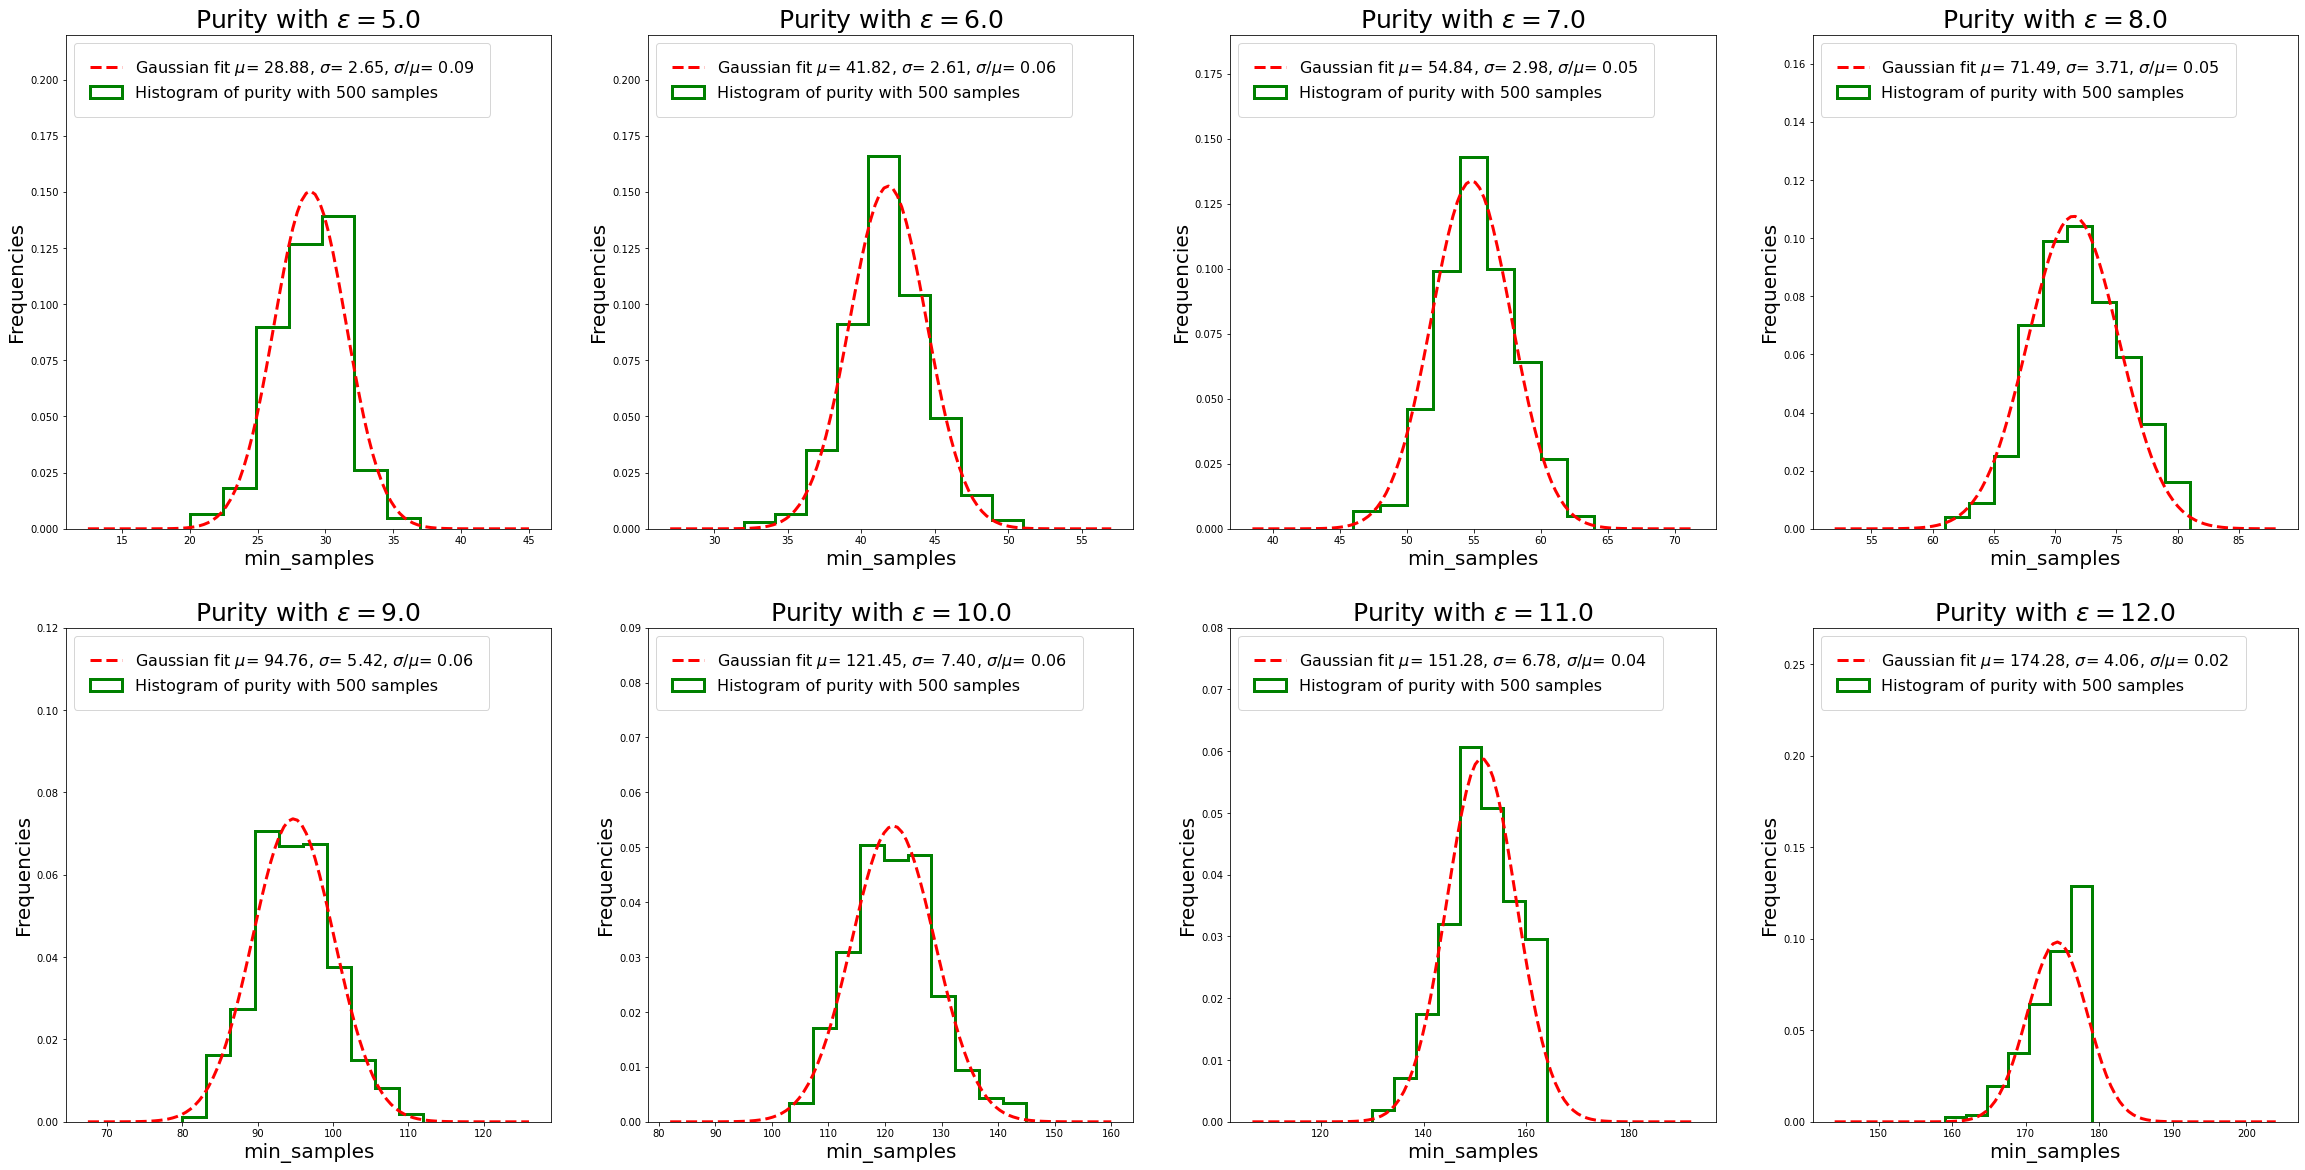

In [0]:
hist_dataframe_p = pd.read_csv('hist_dataframe_p.csv',index_col=0)
hist_dataframe_e = pd.read_csv('hist_dataframe_e.csv',index_col=0)
hist_dataframe_g = pd.read_csv('hist_dataframe_g.csv',index_col=0)

#Purity
epsilon = 5.0

for i in range(4):

  plt.subplot(2,4,i+1)
  if i == 0:
    bins=int(1.5*epsilon)
    x_gaus = np.linspace(2.5*epsilon, 9*epsilon, 100)
    plt.ylim(0, 0.22)
  if i == 1:
    bins=int(1.5*epsilon)
    x_gaus = np.linspace(4.5*epsilon, 9.5*epsilon, 100)
    plt.ylim(0, 0.22)
  if i == 2:
    bins=int(1.3*epsilon)
    x_gaus = np.linspace(5.5*epsilon, 10.2*epsilon, 100)
    plt.ylim(0, 0.19)
  if i == 3:
    bins=int(1.3*epsilon)
    x_gaus = np.linspace(6.5*epsilon, 11*epsilon, 100)
    plt.ylim(0, 0.17)

  
  a = hist_dataframe_p['%d' %i].to_numpy()
  mu, std = norm.fit(a)
  plt.xlabel('min_samples',fontsize=20)
  plt.ylabel('Frequencies',fontsize=20)
  plt.title('Purity with $\epsilon = %.1f$' %epsilon,fontsize=25)
  plt.hist(a, bins=bins, color='green', label='Histogram of purity with 500 samples', density=True,histtype='step',linewidth=3)
  plt.plot(x_gaus, np.exp(-0.5*((x_gaus-mu)/std)**2) /(std*np.sqrt(2*np.pi)), 'r--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf, $\sigma/\mu$= %.2lf'%(mu, std, std/mu))
  plt.legend( loc='upper left', borderpad=1, fontsize=16)

  epsilon+=1

for i in range(4):

  plt.subplot(2,4,i+5)
  if i == 0:
    bins=int(1.2*epsilon)
    x_gaus = np.linspace(7.5*epsilon, 14*epsilon, 100)
    plt.ylim(0, 0.12)
  if i == 1:
    bins=int(1*epsilon)
    x_gaus = np.linspace(8.2*epsilon, 16*epsilon, 100)
    plt.ylim(0, 0.09)
  if i == 2:
    bins=int(0.8*epsilon)
    x_gaus = np.linspace(9.7*epsilon, 17.5*epsilon, 100)
    plt.ylim(0, 0.08)
  if i == 3:
    bins=int(0.6*epsilon)
    x_gaus = np.linspace(12*epsilon, 17*epsilon, 100)
    plt.ylim(0, 0.27)
  a = hist_dataframe_p['%d' %(i+4)].to_numpy()
  mu, std = norm.fit(a)
  plt.xlabel('min_samples',fontsize=20)
  plt.ylabel('Frequencies',fontsize=20)
  plt.title('Purity with $\epsilon = %.1f$' %epsilon,fontsize=25)
  plt.hist(a, bins=bins, color='green', label='Histogram of purity with 500 samples', density=True, histtype='step',linewidth=3)
  plt.plot(x_gaus, np.exp(-0.5*((x_gaus-mu)/std)**2) /(std*np.sqrt(2*np.pi)), 'r--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf, $\sigma/\mu$= %.2lf'%(mu, std, std/mu))
  plt.legend( loc='upper left', borderpad=1, fontsize=16)
  epsilon+=1

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(40, 20)
fig.savefig('Purity_hist_500.png')

plt.show()



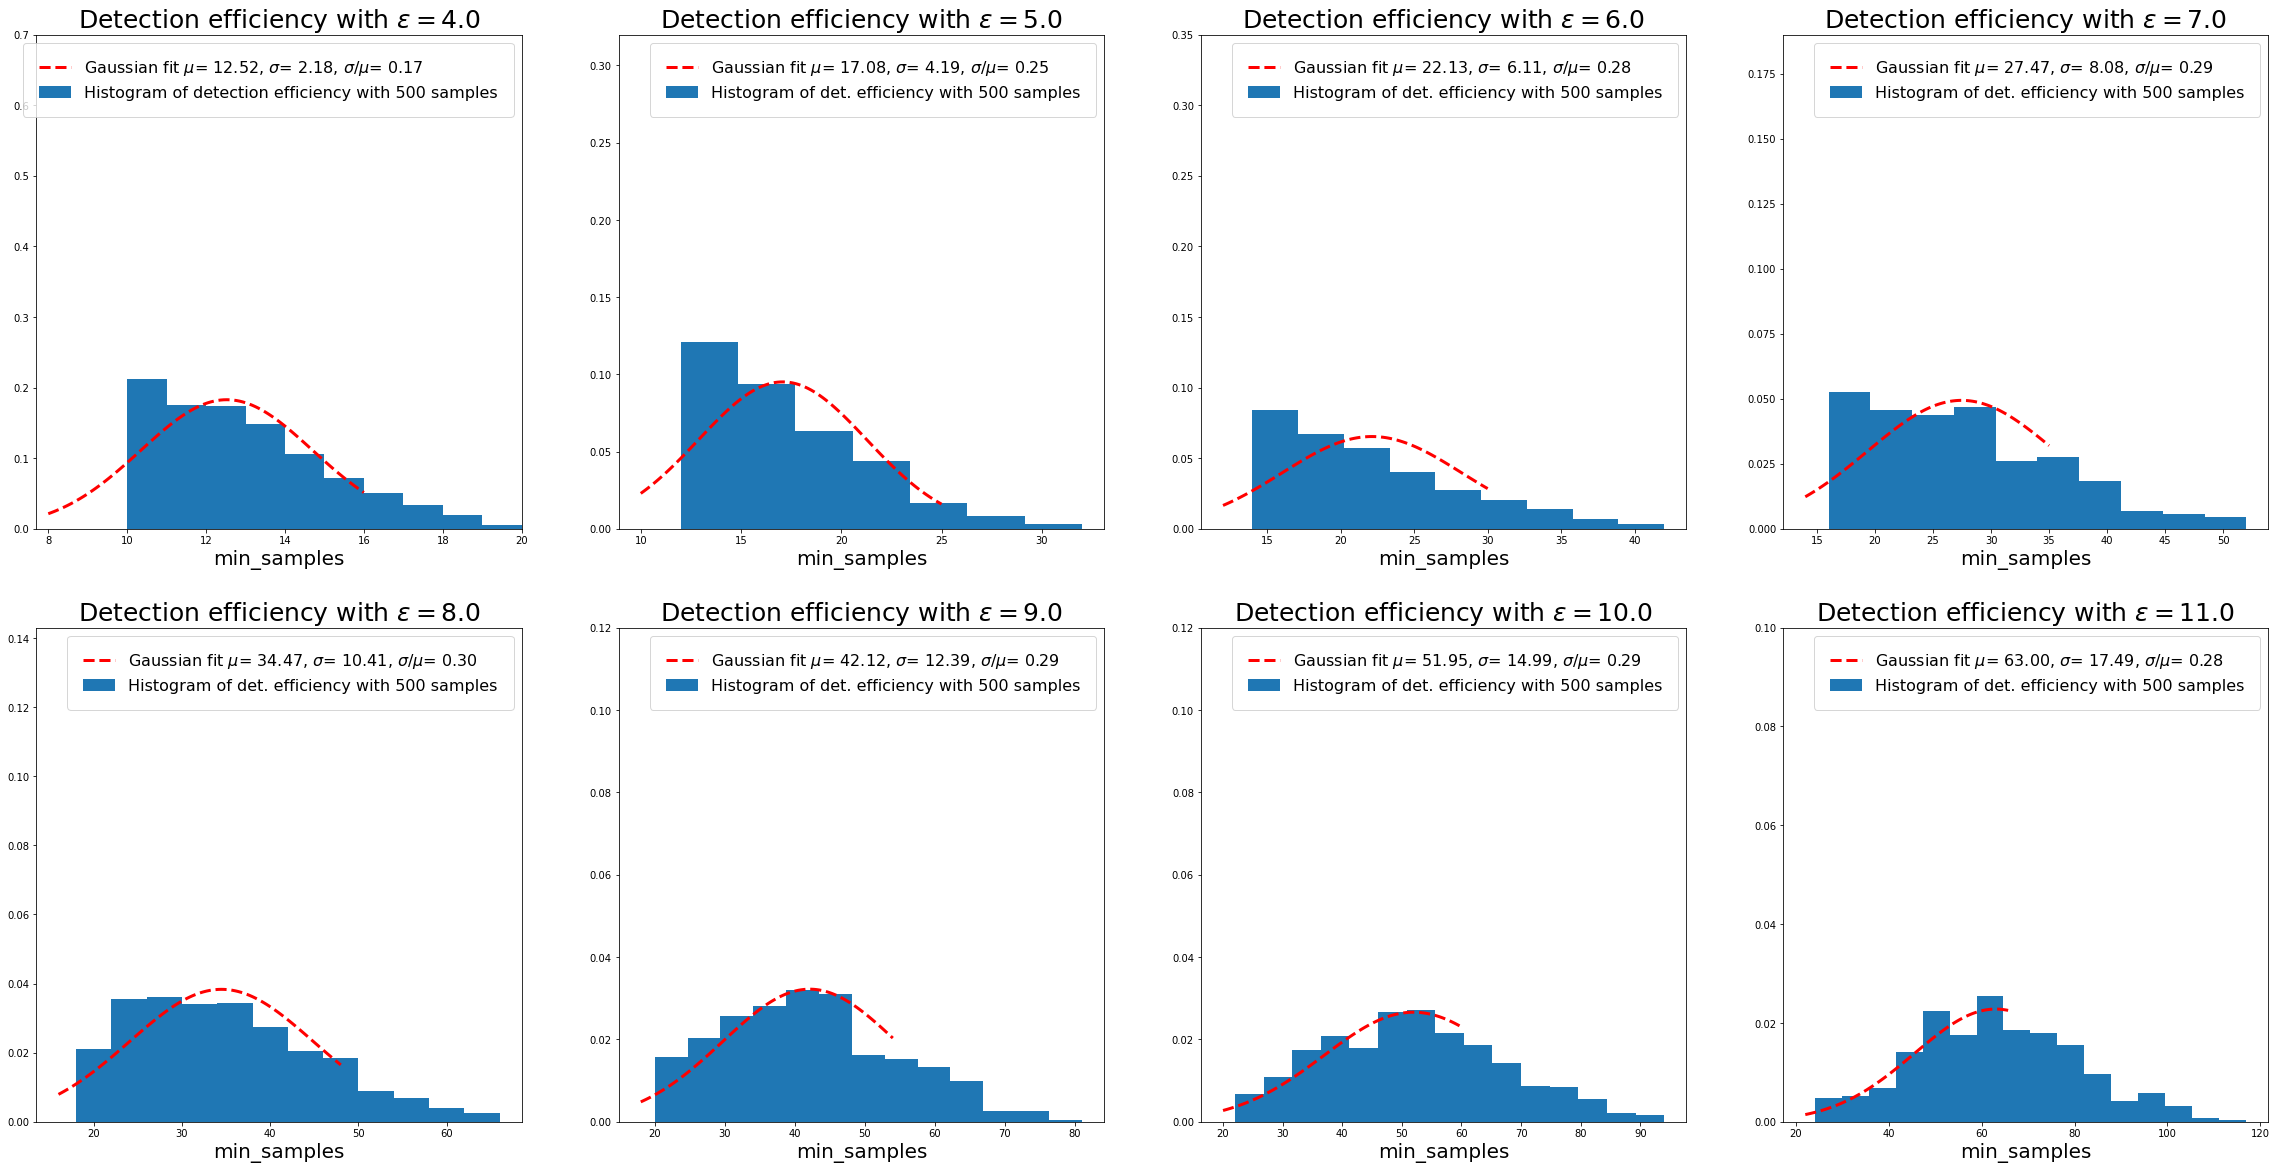

In [0]:
#Efficiency
epsilon = 4.0

for i in range(4):

  plt.subplot(2,4,i+1)
  a = hist_dataframe_e[i].to_numpy()
  if i==0:
    x_gaus = np.linspace(2*epsilon, 4*epsilon, 100)
    unique, count = np.unique(a, return_counts=True)
    mu, std = norm.fit(a, scale=2.5)
    plt.ylim(0, 0.7)
    plt.xlim(7.7, 20)
    plt.bar(unique,count/sum(count), width=1, align='edge', label='Histogram of detection efficiency with 500 samples')
  if i==1:
    x_gaus = np.linspace(2*epsilon, 5*epsilon, 100)
    mu, std = norm.fit(a, scale=1.5)
    plt.ylim(0, 0.32)
  if i==2:
    x_gaus = np.linspace(2*epsilon, 5*epsilon, 100)
    mu, std = norm.fit(a, scale=1.5)
    plt.ylim(0, 0.35)
  if i==3:
    x_gaus = np.linspace(2*epsilon, 5*epsilon, 100)
    mu, std = norm.fit(a, scale=1.5)
    plt.ylim(0, 0.19)
  plt.xlabel('min_samples',fontsize=20)
  plt.title('Detection efficiency with $\epsilon = %.1f$' %epsilon,fontsize=25)
  if i!=0:
    plt.hist(a, bins=int(1.5*epsilon), density=True, label='Histogram of det. efficiency with 500 samples')
  plt.plot(x_gaus, np.exp(-0.5*((x_gaus-mu)/std)**2) /(std*np.sqrt(2*np.pi)), 'r--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf, $\sigma/\mu$= %.2lf'%(mu, std, std/mu))
  plt.legend( loc='upper right', borderpad=1, fontsize=16)
  epsilon+=1

for i in range(4):

  plt.subplot(2,4,i+5)
  a = hist_dataframe_e[i+4].to_numpy()
  x_gaus = np.linspace(2*epsilon, 6*epsilon, 100)
  mu, std = norm.fit(a)
  plt.xlabel('min_samples',fontsize=20)
  plt.title('Detection efficiency with $\epsilon = %.1f$' %epsilon,fontsize=25)
  plt.hist(a, bins=int(1.5*epsilon), density=True, label='Histogram of det. efficiency with 500 samples')
  plt.plot(x_gaus, np.exp(-0.5*((x_gaus-mu)/std)**2) /(std*np.sqrt(2*np.pi)), 'r--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf, $\sigma/\mu$= %.2lf'%(mu, std, std/mu))
  plt.legend( loc='upper right', borderpad=1, fontsize=16)
  if i == 0:
    plt.ylim(0,0.143)
  if i == 1:
    plt.ylim(0,0.12)
  if i == 2:
    plt.ylim(0,0.12)
  if i == 3:
    plt.ylim(0,0.1)
  epsilon+=1

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(40, 20)

plt.show()


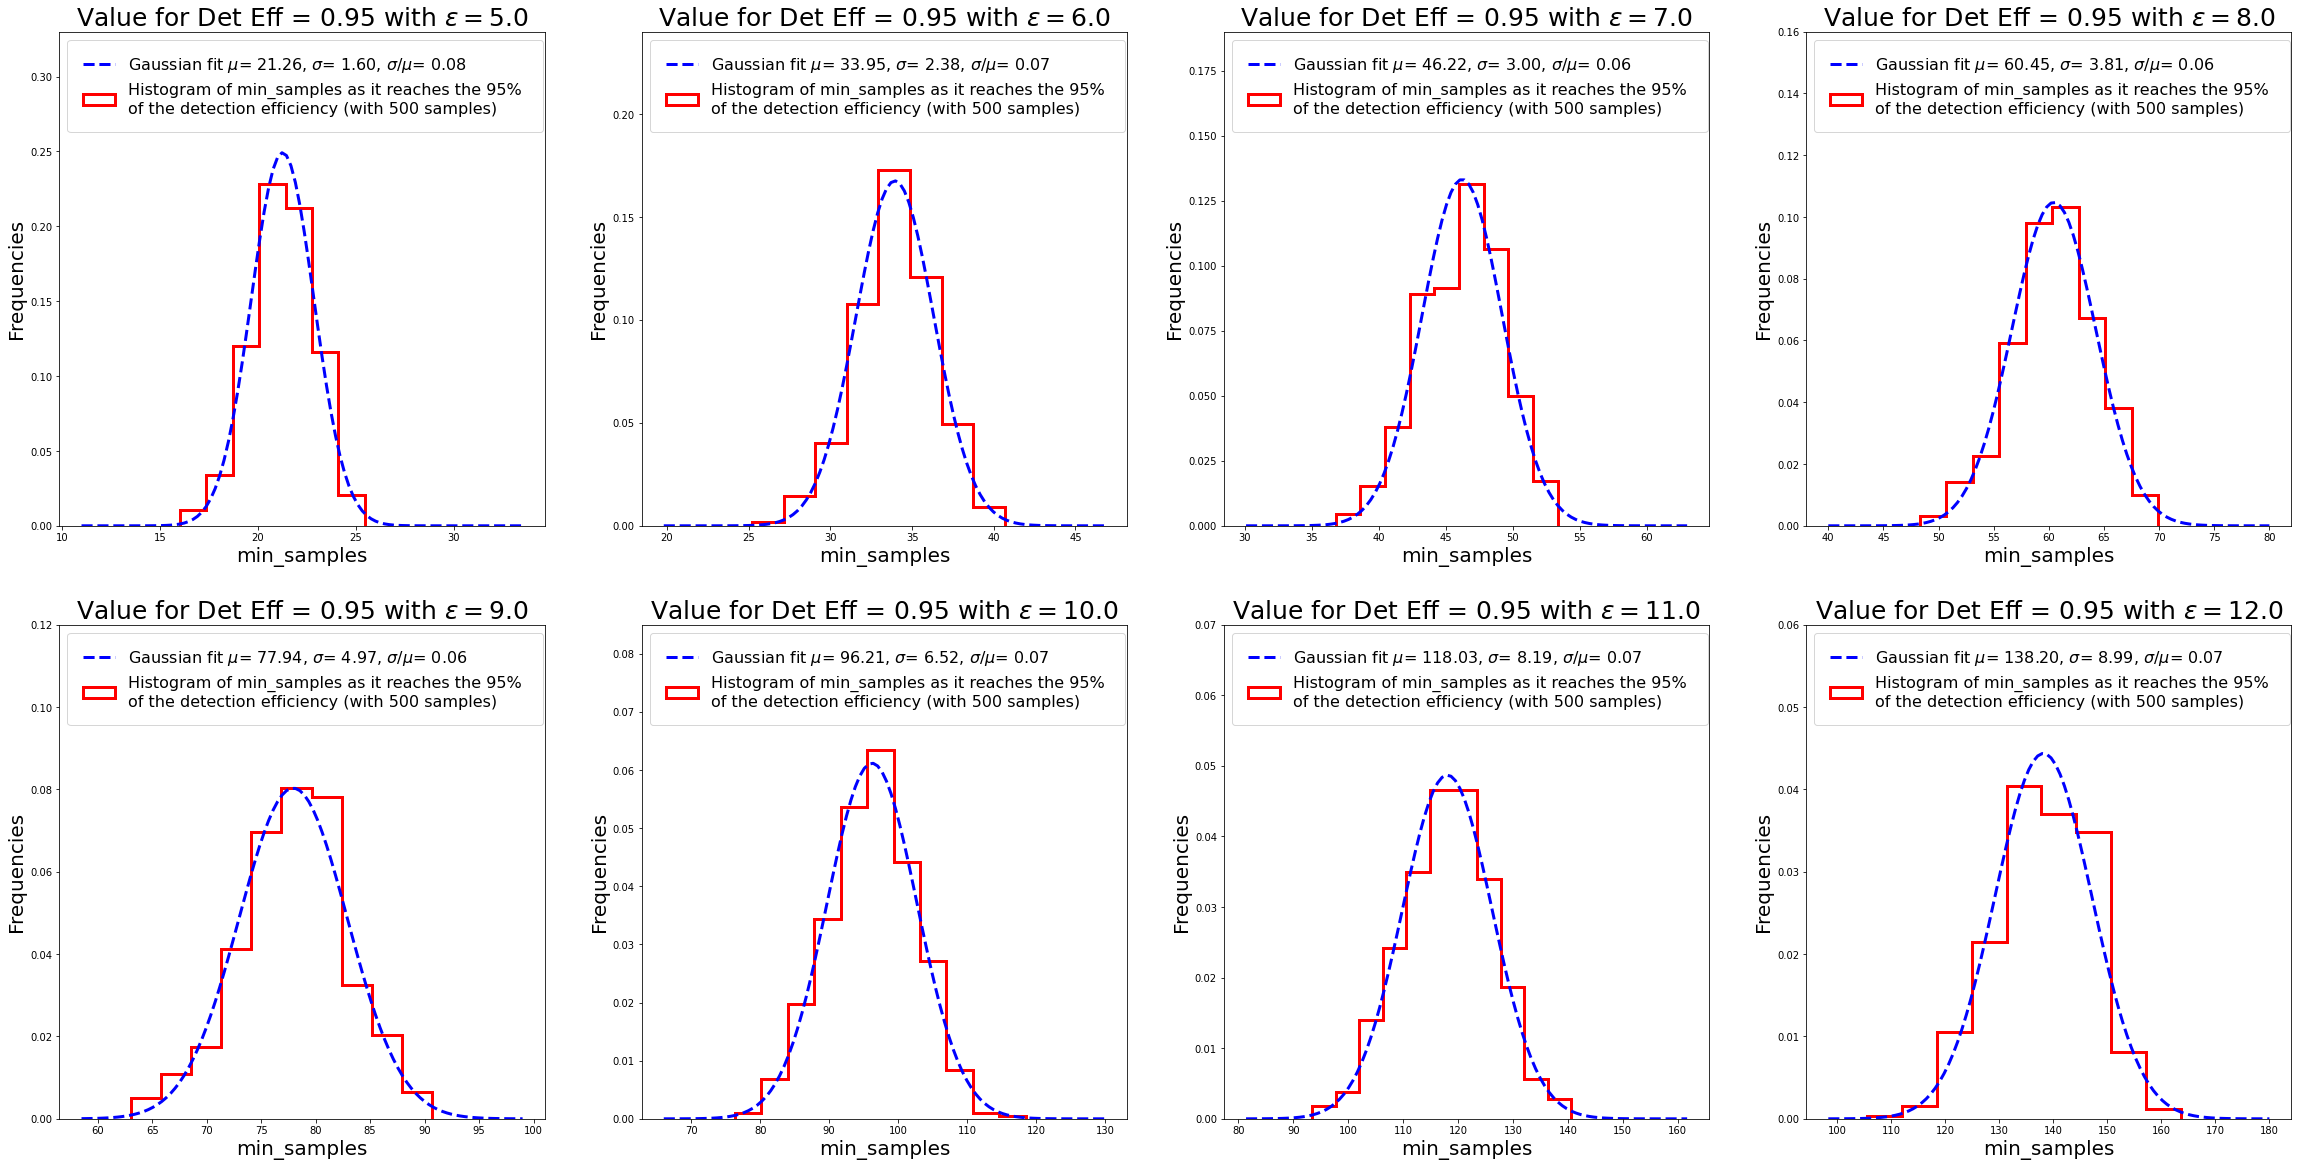

In [0]:
#Ginocchio
hist_dataframe_p = pd.read_csv('hist_dataframe_p.csv',index_col=0)
hist_dataframe_e = pd.read_csv('hist_dataframe_e.csv',index_col=0)
hist_dataframe_g = pd.read_csv('hist_dataframe_g.csv',index_col=0)

epsilon = 5.0

for i in range(4):

  plt.subplot(2,4,i+1)
  if i == 0:
    bins=int(1.5*epsilon)
    x_gaus = np.linspace(2.2*epsilon, 6.7*epsilon, 100)
    plt.ylim(0, 0.33)
  if i == 1:
    bins=int(1.4*epsilon)
    x_gaus = np.linspace(3.3*epsilon, 7.8*epsilon, 100)
    plt.ylim(0, 0.24)
  if i == 2:
    bins=int(1.3*epsilon)
    x_gaus = np.linspace(4.3*epsilon, 9*epsilon, 100)
    plt.ylim(0, 0.19)
  if i == 3:
    bins=int(1.2*epsilon)
    x_gaus = np.linspace(5*epsilon, 10*epsilon, 100)
    plt.ylim(0, 0.16)
  a = hist_dataframe_g['%d' %i].to_numpy()
  mu, std = norm.fit(a)
  plt.xlabel('min_samples',fontsize=20)
  plt.ylabel('Frequencies',fontsize=20)
  plt.title('Value for Det Eff = 0.95 with $\epsilon = %.1f$' %epsilon,fontsize=25)
  plt.hist(a, bins=bins, color='red', label='Histogram of min_samples as it reaches the 95% \nof the detection efficiency (with 500 samples)', density=True,histtype='step',linewidth=3)
  plt.plot(x_gaus, np.exp(-0.5*((x_gaus-mu)/std)**2) /(std*np.sqrt(2*np.pi)), 'b--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf, $\sigma/\mu$= %.2lf'%(mu, std, std/mu))
  plt.legend( loc='upper left', borderpad=1, fontsize=16)
  epsilon+=1

for i in range(4):

  plt.subplot(2,4,i+5)
  if i == 0:
    x_gaus = np.linspace(6.5*epsilon, 11*epsilon, 100)
    plt.ylim(0, 0.12)
    numbin = int(1.2*epsilon)
  if i == 1:
    x_gaus = np.linspace(6.6*epsilon, 13*epsilon, 100)
    plt.ylim(0, 0.085)
    numbin = int(1.1*epsilon)
  if i == 2:
    x_gaus = np.linspace(7.4*epsilon, 14.7*epsilon, 100)
    plt.ylim(0, 0.07)
    numbin = int(1*epsilon)
  if i == 3:
    x_gaus = np.linspace(8.2*epsilon, 15*epsilon, 100)
    plt.ylim(0, 0.06)
    numbin = int(0.8*epsilon)
  a = hist_dataframe_g['%d' %(i+4)].to_numpy()
  mu, std = norm.fit(a)
  plt.xlabel('min_samples',fontsize=20)
  plt.ylabel('Frequencies',fontsize=20)
  plt.title('Value for Det Eff = 0.95 with $\epsilon = %.1f$' %epsilon,fontsize=25)
  plt.hist(a, bins=numbin, color='red', label='Histogram of min_samples as it reaches the 95% \nof the detection efficiency (with 500 samples)', density=True,histtype='step',linewidth=3)
  plt.plot(x_gaus, np.exp(-0.5*((x_gaus-mu)/std)**2) /(std*np.sqrt(2*np.pi)), 'b--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf, $\sigma/\mu$= %.2lf'%(mu, std, std/mu))
  plt.legend( loc='upper left', borderpad=1, fontsize=16)
  epsilon+=1

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(40, 20)
fig.savefig('Detection_hist_500.png')

plt.show()

# GRAFICO PURITY VS DETECTION EFFICIENCY VS $N_{cluster}$

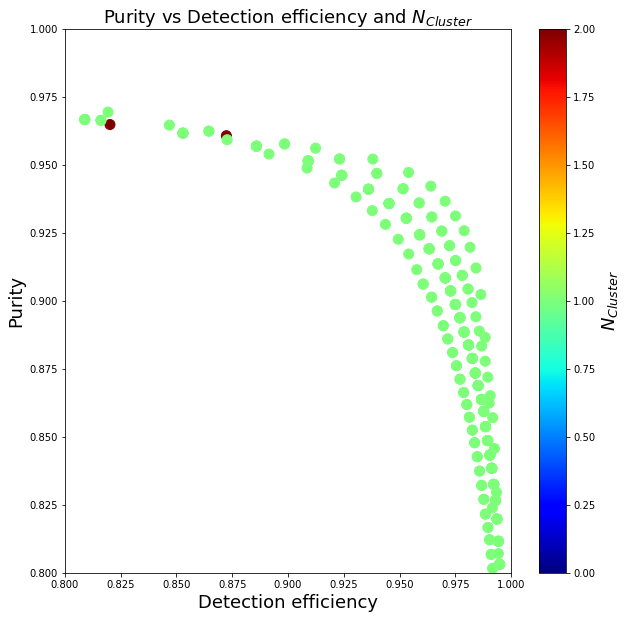

In [0]:
import statistics as st

dataframe_e = pd.read_csv('dataframe_e.csv',index_col=0)
dataframe_p = pd.read_csv('dataframe_p.csv',index_col=0)
dataframe_n = pd.read_csv('dataframe_n.csv',index_col=0)

min_eps = 5
max_eps = 13
step_eps = 1

n_eps = int((max_eps-min_eps)/step_eps)
eps = 5
min_k = 0

mean_e = []
mean_p = []
mean_n = []

std_e = []
std_p = []

for i in np.arange(0,n_eps,1):

  for k in np.arange(min_k,int(13*eps)+min_k,1):

    a = dataframe_e['%d' %k].to_numpy()
    b = dataframe_p['%d' %k].to_numpy()
    c = dataframe_n['%d' %k].to_numpy()
    
    mean_e.append(st.mean(a))
    mean_p.append(st.mean(b))
    mean_n.append(st.mean(c))

    std_e.append(st.stdev(a))
    std_p.append(st.stdev(b))
  
  min_k = int(13*eps)
  eps+=1

fig = plt.figure(figsize=(12,12))
fig = matplotlib.pyplot.gcf()
plt.scatter(mean_e,mean_p,c=mean_n,cmap='jet',s=100)
plt.xlim(0.80,1)
plt.ylim(0.80,1)
ax = plt.colorbar()
ax.set_label('$N_{Cluster}$',fontsize=18)
#plt.errorbar(mean_e,mean_p,std_p,std_e,markersize=0,fmt='.')
plt.title('Purity vs Detection efficiency and $N_{Cluster}$',fontsize=18)
plt.xlabel('Detection efficiency',fontsize=18)
plt.ylabel('Purity',fontsize=18)
#plt.colorbar()
fig.set_size_inches(10, 10)
plt.show()
fig.savefig('Purity_vs_Detection.png')


In [0]:
import statistics as st

purity_dataframe = pd.DataFrame(purity_highest)
efficiency_dataframe = pd.DataFrame(efficiency_highest)

purity_mean = []
purity_std = []

efficiency_mean = []
efficiency_std = []

for i in range(8):

  a = purity_dataframe[i].to_numpy()
  b = efficiency_dataframe[i].to_numpy()

  mean_p = st.mean(a)
  mean_e = st.mean(b)

  std_p = st.stdev(a)
  std_e = st.stdev(b)

  purity_mean.append(mean_p)
  purity_std.append(std_p)

  efficiency_mean.append(mean_e)
  efficiency_std.append(std_e)

print(purity_mean)
print(purity_std)
print(efficiency_mean)
print(efficiency_std)